In [ ]:
# GitHub repo installation of paddle
#!python -m pip install paddlepaddle-gpu==2.3.0 -i https://mirror.baidu.com/pypi/simple
!python -m pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
# Install paddle OCR
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

In [ ]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 46559, done.
remote: Counting objects: 100% (422/422), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 46559 (delta 237), reused 260 (delta 123), pack-reused 46137
Receiving objects: 100% (46559/46559), 342.93 MiB | 24.10 MiB/s, done.
Resolving deltas: 100% (32648/32648), done.


In [ ]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

##2. Instantiate Model and Detect

In [ ]:
# Setup model
ocr_model = PaddleOCR(lang='en',
                      use_gpu=False,
                      use_angle_cls=True,
                      det=True,
                      rec=True) #only recognition

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:07<00:00, 535kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:12<00:00, 780kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:05<00:00, 389kiB/s]

[2023/07/04 20:29:46] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

In [ ]:
import glob

In [ ]:
images = [img for img in glob.glob('/content/*.JPG')]
images

['/content/S1013434.JPG',
 '/content/S1013768.JPG',
 '/content/S1013793.JPG',
 '/content/S1013810.JPG']

[2023/07/04 20:52:05] ppocr DEBUG: dt_boxes num : 1, elapse : 0.667567253112793
[2023/07/04 20:52:05] ppocr DEBUG: cls num  : 1, elapse : 0.013224601745605469
[2023/07/04 20:52:05] ppocr DEBUG: rec_res num  : 1, elapse : 0.09293651580810547
[2023/07/04 20:52:07] ppocr DEBUG: dt_boxes num : 2, elapse : 0.9868638515472412
[2023/07/04 20:52:07] ppocr DEBUG: cls num  : 2, elapse : 0.04333782196044922
[2023/07/04 20:52:07] ppocr DEBUG: rec_res num  : 2, elapse : 0.31342029571533203
[2023/07/04 20:52:09] ppocr DEBUG: dt_boxes num : 0, elapse : 0.9125826358795166
[2023/07/04 20:52:09] ppocr DEBUG: cls num  : 0, elapse : 0
[2023/07/04 20:52:09] ppocr DEBUG: rec_res num  : 0, elapse : 2.384185791015625e-06
[2023/07/04 20:52:10] ppocr DEBUG: dt_boxes num : 3, elapse : 0.8019747734069824
[2023/07/04 20:52:10] ppocr DEBUG: cls num  : 3, elapse : 0.028947830200195312
[2023/07/04 20:52:11] ppocr DEBUG: rec_res num  : 3, elapse : 0.26456451416015625


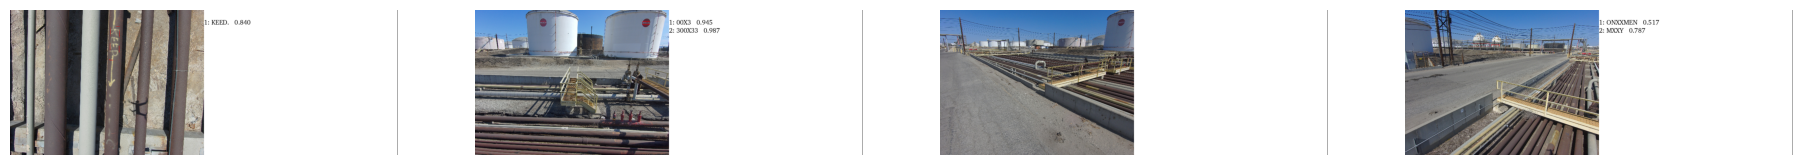

In [ ]:
#run on multiple images
results = []
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')
# resizing display area
plt.figure(figsize=(35,25))
rows =3

for id,img in enumerate(images):
    result = ocr_model.ocr(img)
    boxes = [res[0] for res in result[0]]
    texts = [res[1][0] for res in result[0]]
    scores = [res[1][1] for res in result[0]]
    plt.title(img.split('/')[0])
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # draw annotations on image
    plt.subplot(rows,6,id+1)
    plt.axis('off')
    annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)
    # show the image using matplotlib
    plt.imshow(annotated)
    result,boxes,texts,scores = [],[],[],[]
    #results.append(result)

In [ ]:
results[0]

[[[[[2101.0, 357.0], [2291.0, 361.0], [2276.0, 1068.0], [2086.0, 1064.0]],
   ('KEED.', 0.8404446840286255)]]]

In [ ]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2023/07/04 20:16:55] ppocr DEBUG: dt_boxes num : 3, elapse : 0.6737480163574219
[2023/07/04 20:16:55] ppocr DEBUG: cls num  : 3, elapse : 0.026854753494262695
[2023/07/04 20:16:55] ppocr DEBUG: rec_res num  : 3, elapse : 0.2507445812225342


In [ ]:
#!paddleocr --image_dir '/content/S1013768.JPG' --use_angle_cls true --det true --rec true --lang en --use_gpu false

In [ ]:
for res in result[0]:
    print(res[0][0])

[2101.0, 357.0]


In [ ]:
result[0][0][1][0]

'ONXXMEN'

##3. Visualise Results

In [ ]:
# Extracting detected components
boxes = [res[0] for res in result[0]] #
texts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [ ]:
[res[1][0] for res in result[0]]

['KEED.']

In [ ]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path)

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

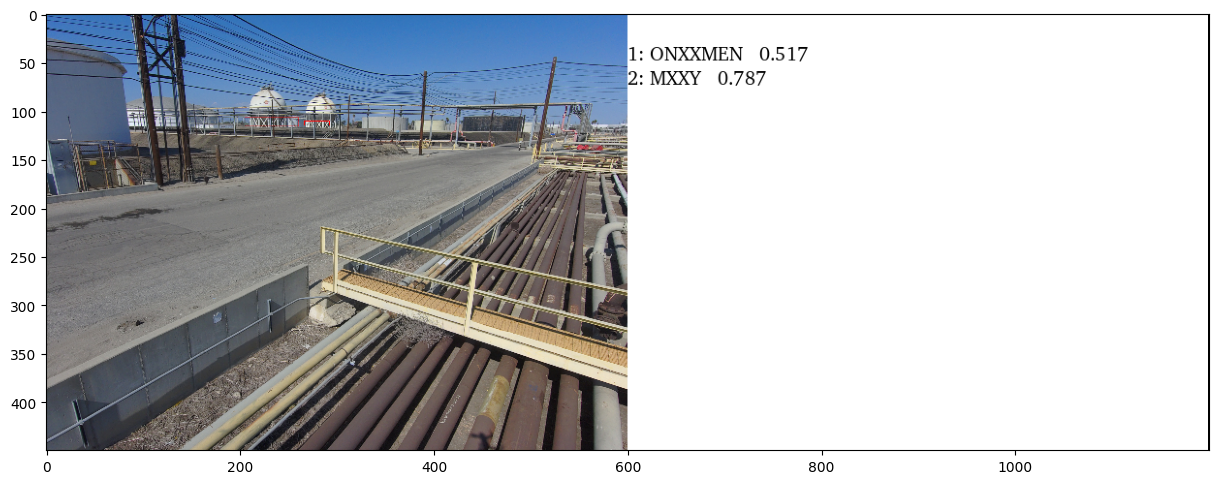

In [ ]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)

# show the image using matplotlib
plt.imshow(annotated)